In [1]:
import sys, os, pickle
import numpy as np
import pandas as pd
from rdkit.Chem import AllChem, Descriptors
import sklearn
from sklearn.metrics import confusion_matrix, precision_score,recall_score 
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, roc_auc_score
from imblearn.ensemble import BalancedRandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
RF_model = pickle.load(open('model/RF_model.pickle.dat','rb'))

### Make prediction

In [3]:
#Fingerprints = ['MFP_%d'%(i+1) for i in range(2048)]
#descriptors = ['HeavyAtomMolWt','NHOHCount','NOCount','RingCount']
#features = Fingerprints + descriptors
features = pickle.load(open('model/RF_features.pickle','rb'))
len(features)

743

In [4]:
df = pd.read_csv('dataset/feature_set_all/test_set_combined.csv')
X_test = np.c_[df[features]]
y_test = np.c_[df['BBclass']]
y_test_predict = RF_model.predict(X_test)
len(df)

2563

Confusion matrix

In [5]:
confusion_matrix(y_test, y_test_predict)

array([[ 683,  189],
       [ 239, 1452]])

Precision

In [6]:
precision_score(y_test, y_test_predict)

0.8848263254113345

Recall

In [7]:
recall_score(y_test, y_test_predict)

0.8586635127143702

Accuracy

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_predict)

0.833008193523215

F1_score

In [9]:
f1_score(y_test, y_test_predict)

0.8715486194477792

Specificity (TN/(TN+FP))

In [10]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_predict).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
specificity, sensitivity

(0.783256880733945, 0.8586635127143702)

### ROC curve

In [11]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

In [12]:
y_probas = RF_model.predict_proba(X_test)
y_scores = y_probas[:, 1] 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, y_scores)

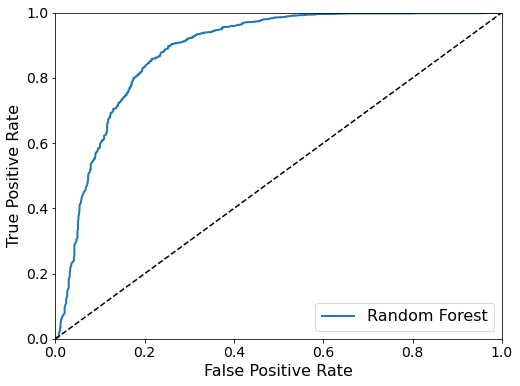

In [13]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [14]:
roc_auc_score(y_test, y_scores)

0.8835175022650948

Precision vs Recall

In [15]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.axis([0, 1, 0, 1])

In [16]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

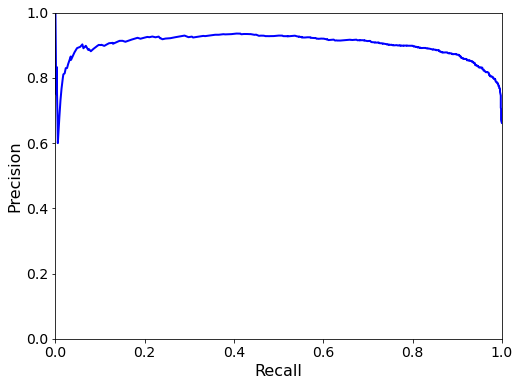

In [17]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [18]:
sklearn.metrics.auc(recalls, precisions)

0.9007425228814051